# The Heartbeart Chord

This notebook shows how the heartbeat chord was derived. What is this heartbeat chord?
Well, the premise is that the typical electrocardiogram (ECG) looks like a waveform,
and waveforms are typically thought of as the sum of some pure sinusoidal waves (c.f. Fourier's theorem).
Here we'd like to decompose a heartbeat into a few sinusoids, or tones, 
determine the frequency ratios between these,
then transform those into intervals on a real instrument to build a chord.

From the start, this is just an idea, and I have no idea if it will work and I only plan to use this
chord in two short places in the choruses for "Singleton".

Here goes...

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal
import seaborn
from IPython.display import Audio
seaborn.set()

In [10]:
# url = "https://github.com/paulvangentcom/heartrate_analysis_python/raw/master/data2.csv"
url = "https://github.com/paulvangentcom/heartrate_analysis_python/raw/master/data.csv"
df = pd.read_csv(url, header=None, names=["hr"])

df.head()

,hr
0,530
1,518
2,506
3,494
4,483


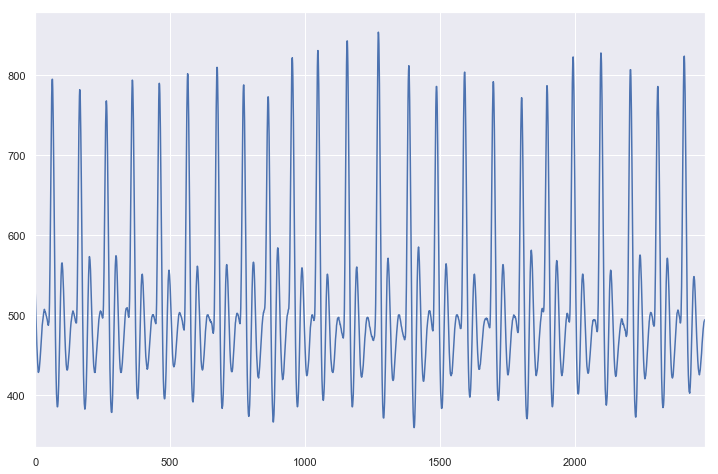

In [8]:
df.hr.plot(figsize=(12, 8))

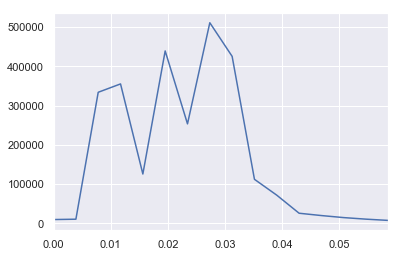

In [28]:
f, s = scipy.signal.welch(df.hr.values)
spec = pd.Series(data=s, index=f)
spec.loc[:0.06].plot()

0.009666    68358.757707
0.029400    65240.211515
0.020137    48916.252553
0.028192    40591.294574
dtype: float64

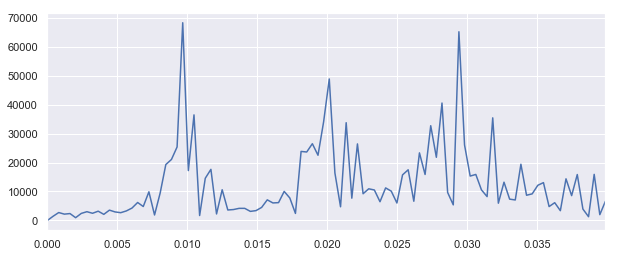

In [76]:
f = np.fft.fftfreq(n=len(df))
s = np.real(np.abs(np.fft.fft(df.hr.values - df.hr.values.mean())))
spec = pd.Series(data=s, index=f)
spec = spec[(spec.index >= 0) & (spec.index < 0.04)]
spec.rolling(1, center=True).mean().plot(figsize=(10, 4))
spec.sort_values(ascending=False).head(n=4)

In [78]:
freqs = spec.sort_values(ascending=False).head(n=4).index.values
freqs /= freqs[0]
freqs

array([1.        , 3.04166667, 2.08333333, 2.91666667])

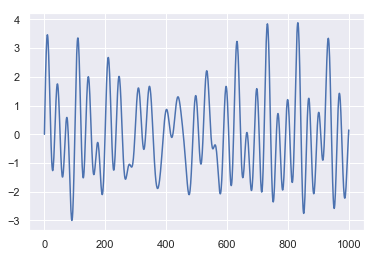

In [92]:
# Let's make these tones into a chord

# Let's create a 1 second time array sampled at 44100
t = np.linspace(0, 1, num=44100)
# Now scale the frequencies to concert A
fs = freqs * 440
# Create an array of sound (a plot of how a speaker should move, basically)
sig = np.zeros(len(t))
for f in fs:
    sig += np.sin(2 * np.pi * f * t)
    
plt.plot(sig[:1000])

We can see beating in this signal, which I assume means it will be pretty dissonant.
This probably comes from the two pairs of frequencies relatively close to each other
(think a minor 2nd interval).

In [93]:
Audio(data=sig, rate=44100)

This actually sounds like a ringing phone.

Let's hear what the original heartbeat sounds like.

In [71]:
Audio(df.hr, rate=22500)

In [81]:
# How many semitones does each frequency represent?

def semitones(ratio):
    """Return how many semitones a frequency ratio represents as an interval.
    
        ratio = 2**(n/12)
    """
    return 12 * np.log2(ratio)

semitones(1.5)  # This should be close to a 5th, or 7 semitones

7.019550008653875

In [84]:
semitone_ratios = semitones(freqs)

semitone_ratios % 12  # Modulo 12 to put these all in the same octave

array([0.        , 7.2583447 , 0.70672427, 6.53184619])

So it looks like we have (in ascending order):

1. Something slightly lower than a minor 2 (probably an octave bent up)
2. Something between a flat fifth and a fifth (flat fifth bent up)
3. Something slightly higher than a fifth (a fifth bent up a quarter of a semitone)

Now to work out on the guitar.

From messing around, this chord in the chorus would be rooted around a
D (tuned down a half step) played with the root at the 10th fret on the
low E string.

```

```